# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [103]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd


# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [104]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [105]:
#  1. Get the total rides for each city type
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [106]:
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "suburban"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()

Series([], Name: ride_id, dtype: int64)

In [107]:
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "rural"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

Series([], Name: ride_id, dtype: int64)

In [108]:
# 2. Get the total drivers for each city type

urban_driver_count = urban_cities_df.groupby(["city"]).sum()["driver_count"]
urban_driver_count.head()


city
Amandaburgh         216
Barajasview         572
Carriemouth        1404
Christopherfurt    1107
Deanville           931
Name: driver_count, dtype: int64

In [109]:
suburban_driver_count = suburban_cities_df.groupby(["city"]).sum()["driver_count"]
suburban_driver_count.head()

Series([], Name: driver_count, dtype: int64)

In [110]:
rural_driver_count = rural_cities_df.groupby(["city"]).sum()["driver_count"]
rural_driver_count.head()

Series([], Name: driver_count, dtype: int64)

In [111]:
#  3. Get the total amount of fares for each city type
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [112]:
#  4. Get the average fare per ride for each city type. 
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, nan, nan)

In [113]:
# 5. Get the average fare per driver for each city type. 
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()


city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [114]:
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count.head()

Series([], Name: driver_count, dtype: float64)

In [115]:
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count.head()

Series([], Name: driver_count, dtype: float64)

In [116]:
#  6. Create a PyBer summary DataFrame. 
ride_count = pyber_data_df.count()
driver_count = pyber_data_df.count()
fare_count = pyber_data_df.count()
average_fare_per_ride = pyber_data_df.count()
average_fare_per_driver = pyber_data_df.count()

pyber_summary_df = pd.DataFrame([{"Total Rides": ride_count,
                                     "Total Drivers": driver_count,
                                     "Total Fares": fare_count,
                                     "Average Fare per Ride": average_fare_per_ride,
                                     "Average Fare per Driver": average_fare_per_driver}])
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
0,city 2375 date 2375 fare...,city 2375 date 2375 fare...,city 2375 date 2375 fare...,city 2375 date 2375 fare...,city 2375 date 2375 fare...


In [117]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [118]:
#  8. Format the columns.

import numpy as np
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

pyber_summary_df




TypeError: unsupported format string passed to Series.__format__

## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [119]:
# 1. Read the merged DataFrame
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [120]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.


sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [121]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()

pyber_data_df = pyber_data_df.reset_index()


In [122]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

pyber_data_df.pivot(index="date",columns="type",values="fare")



type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [123]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.


date=pyber_data_df.count()
rural_type=pyber_data_df.count()
suburban_type=pyber_data_df.count()
urban_type=pyber_data_df.count()
pyber_summary_df = pd.DataFrame([{"date":date,
                                  "rural type":rural_type,
                                  "suburban type": suburban_type, 
                                  "urban type": urban_type}])
pyber_summary_df.head()



,date,rural type,suburban type,urban type
0,index 2375 city 2375 date...,index 2375 city 2375 date...,index 2375 city 2375 date...,index 2375 city 2375 date...


In [124]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

pyber_summary_df.index = pd.to_datetime(pyber_summary_df.index)


In [125]:
# 7. Check that the datatype for the index is datetime using df.info()

pyber_summary_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1 entries, 1970-01-01 to 1970-01-01
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           1 non-null      object
 1   rural type     1 non-null      object
 2   suburban type  1 non-null      object
 3   urban type     1 non-null      object
dtypes: object(4)
memory usage: 40.0+ bytes


In [126]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
sum_of_fares_week = pyber_summary_df.resample("Y").sum()
sum_of_fares_week 

,date,rural type,suburban type,urban type
1970-12-31,index 2375 city 2375 date...,index 2375 city 2375 date...,index 2375 city 2375 date...,index 2375 city 2375 date...


Text(0.5, 1.0, 'Total Fare by City Type')

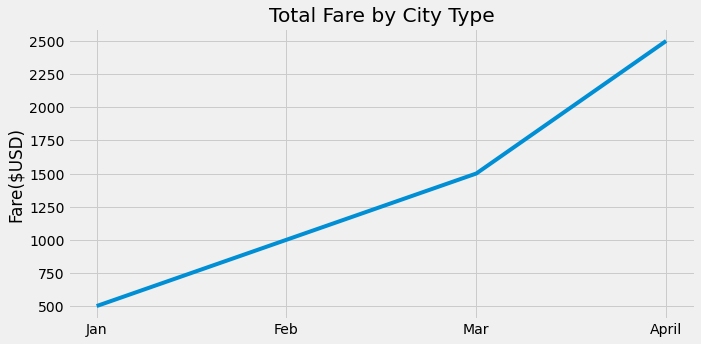

In [129]:

# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

import matplotlib.pyplot as plt

y_axis = [500,1000,1500,2500]
x_axis = ["Jan","Feb","Mar","April"]
# Create the plot with ax.plt()
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x_axis, y_axis)
plt.ylabel("Fare($USD)")
plt.title("Total Fare by City Type")

